In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [25]:
df=pd.read_csv('/content/archive.zip')

In [26]:
df.keys()

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [27]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [28]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [29]:
df.shape

(199, 8)

In [38]:
features = ['Area','perimeter','kernel length','kernel width'] # x values
x = df.drop(df.columns[[2,5,6,7]],axis=1)
x

,Area,Perimeter,Kernel.Length,Kernel.Width
0,15.26,14.84,5.763,3.312
1,14.88,14.57,5.554,3.333
2,14.29,14.09,5.291,3.337
3,13.84,13.94,5.324,3.379
4,16.14,14.99,5.658,3.562
...,...,...,...,...
194,12.19,13.20,5.137,2.981
195,11.23,12.88,5.140,2.795
196,13.20,13.66,5.236,3.232
197,11.84,13.21,5.175,2.836


In [39]:
x = StandardScaler(). fit_transform(x)
x

array([[ 1.17164313e-01,  1.86796669e-01,  2.70859533e-01,
         1.23134738e-01],
       [-1.33019710e-02, -1.97599275e-02, -2.01480879e-01,
         1.78783064e-01],
       [-2.15868043e-01, -3.86971654e-01, -7.95861398e-01,
         1.89382745e-01],
       [-3.70367589e-01, -5.01725319e-01, -7.21281333e-01,
         3.00679397e-01],
       [ 4.19296759e-01,  3.01550333e-01,  3.35593258e-02,
         7.85614810e-01],
       [-1.84968134e-01, -2.95168722e-01, -5.81161211e-01,
         1.23134738e-01],
       [-7.85351128e-02, -8.09618819e-02, -1.81140862e-01,
        -1.73110370e-02],
       [ 5.87529598e-01,  6.61111815e-01,  9.26260105e-01,
         5.28572542e-01],
       [ 5.22296457e-01,  5.00456685e-01,  5.44319772e-01,
         6.34569353e-01],
       [ 1.17164313e-01,  1.94446913e-01,  1.60119436e-01,
        -6.23596819e-02],
       [-3.05134448e-01, -3.33419944e-01, -4.63641108e-01,
        -1.71006414e-01],
       [-3.53200973e-01, -4.40523364e-01, -4.61381106e-01,
      

In [40]:
x = StandardScaler(). fit_transform(x)
df2 = pd.DataFrame(data = x, columns=features)
df2.head()

,Area,perimeter,kernel length,kernel width
0,0.117164,0.186797,0.270860,0.123135
1,-0.013302,-0.019760,-0.201481,0.178783
2,-0.215868,-0.386972,-0.795861,0.189383
3,-0.370368,-0.501725,-0.721281,0.300679
4,0.419297,0.301550,0.033559,0.785615


In [41]:
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [42]:
pca = PCA()
sy = pca.fit_transform(x)
sy

array([[ 3.48214869e-01,  1.10028526e-01,  4.83032943e-02,
         3.81371498e-02],
       [-2.81603279e-02, -2.65702906e-01, -6.90806058e-03,
         4.10678287e-02],
       [-6.05010340e-01, -7.06284824e-01, -2.67750300e-02,
        -3.82048035e-03],
       [-6.50622565e-01, -7.31773821e-01,  1.92512878e-01,
         6.07573293e-02],
       [ 7.68691360e-01, -5.39887262e-01,  4.90893197e-02,
         1.68762983e-02],
       [-4.69541919e-01, -5.03635863e-01, -8.73297637e-03,
         7.30343882e-03],
       [-1.78698519e-01, -1.13802452e-01, -2.73030723e-02,
         1.43058499e-02],
       [ 1.34995942e+00,  2.82346903e-01,  1.30307516e-01,
         2.27223999e-02],
       [ 1.09927861e+00, -6.82761081e-02,  9.50550001e-02,
         1.01100687e-02],
       [ 2.06586242e-01,  1.66361512e-01, -1.02771436e-01,
         1.21674097e-02],
       [-6.36685895e-01, -2.06627901e-01, -1.54192967e-02,
         1.34308664e-02],
       [-7.17065804e-01, -2.10042882e-01,  6.45322725e-02,
      

In [43]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

In [44]:
principleDf = pd.DataFrame(data=principalComponents, columns= ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])


In [45]:
principleDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.348215,0.110029,0.048303,0.038137
1,-0.028160,-0.265703,-0.006908,0.041068
2,-0.605010,-0.706285,-0.026775,-0.003820
3,-0.650623,-0.731774,0.192513,0.060757
4,0.768691,-0.539887,0.049089,0.016876
5,-0.469542,-0.503636,-0.008733,0.007303
6,-0.178699,-0.113802,-0.027303,0.014306
7,1.349959,0.282347,0.130308,0.022722
8,1.099279,-0.068276,0.095055,0.010110
9,0.206586,0.166362,-0.102771,0.012167


Text(0, 0.5, 'y1')

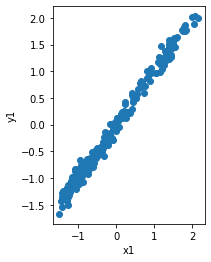

In [46]:
plt.subplot(121)
plt.scatter(x[:,0], x[:,1])
plt.xlabel('x1')
plt.ylabel('y1')